In [130]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-28 02:15:29,910 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:b4:69:26:3c
2023-03-28 02:15:34,000 | INFO     |: Connected to c0:83:b4:69:26:3c


In [168]:
incoming_data = []
time = []
distance = []
speed = []
data = []
def pid(uiud, byte_arr):
    global incoming_data
    global data
    global time
    global distance
    global speed
    
    incoming_data = ble.bytearray_to_string(byte_arr)
    data.append(incoming_data)
    time.append(float(incoming_data[incoming_data.find('T')+2:incoming_data.find('S')-1]))
    speed.append(float(incoming_data[incoming_data.find('S')+2:incoming_data.find('D')-1]))
    distance.append(float(incoming_data[incoming_data.find('D')+2:]))
   

ble.start_notify(ble.uuid['RX_STRING'], pid)
ble.send_command(CMD.SET_PID, "0.08")

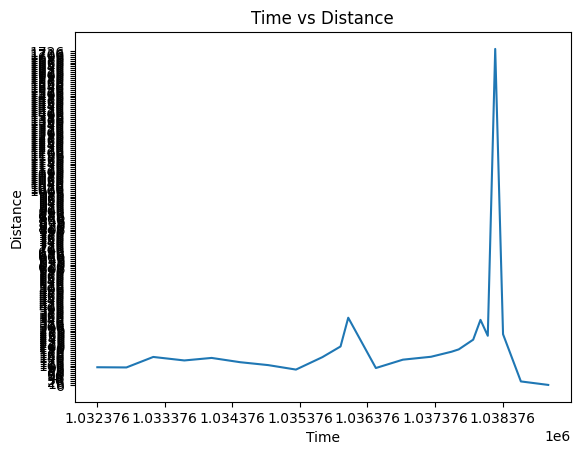

In [167]:
#Distance 
plt.plot (time [0:], distance [0:])
plt.xticks(np.arange(min(time), max(time), 1000))
plt.yticks(np.arange(min(distance), max(distance), 10))
plt.title ('Time vs Distance')
plt.xlabel ('Time')
plt.ylabel ('Distance')
plt.show()





In [144]:
ble.stop_notify(ble.uuid['RX_STRING'])